# Init connection

In [1]:
import iris, irisnative
import time, json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")

connection = iris.connect("iris:1972/FHIRREPO", "superuser", "SYS")
irispy = irisnative.createIris(connection)

# Run SQL queries

```sql
SELECT * FROM demo.Observation
```

In [2]:
data = pd.read_sql_query("SELECT * FROM demo.Observation", connection)
data

,ID,CodeCodingCode,CodeCodingDisplay,Key,ValueQuantityValue
0,23,8302-2,Body Height,Observation/23,154.20
1,24,72514-3,Pain severity - 0-10 verbal numeric rating [Sc...,Observation/24,3.00
2,25,29463-7,Body Weight,Observation/25,66.00
3,26,39156-5,Body Mass Index,Observation/26,27.76
4,27,85354-9,Blood Pressure,Observation/27,NaN
...,...,...,...,...,...
2577,5155,39156-5,Body Mass Index,Observation/5155,27.68
2578,5156,85354-9,Blood Pressure,Observation/5156,NaN
2579,5157,8867-4,Heart rate,Observation/5157,64.00
2580,5158,9279-1,Respiratory rate,Observation/5158,13.00


# Stats for BloodGlucose

In [3]:
values = np.array(data.loc[(data.CodeCodingCode == "2339-0")]['ValueQuantityValue'])

print("Mean value:       ", values.mean())
print("Standard deviation:", values.std())
print("Minimum values:    ", values.min())
print("Maximum values:    ", values.max())

print("25th percentile:   ", np.percentile(values, 25))
print("Median:            ", np.median(values))
print("75th percentile:   ", np.percentile(values, 75))

Mean value:        111.20473684210526
Standard deviation: 8.362012706860432
Minimum values:     91.94
Maximum values:     124.76
25th percentile:    104.53
Median:             110.94
75th percentile:    117.74


# BloodGlucose Distribution

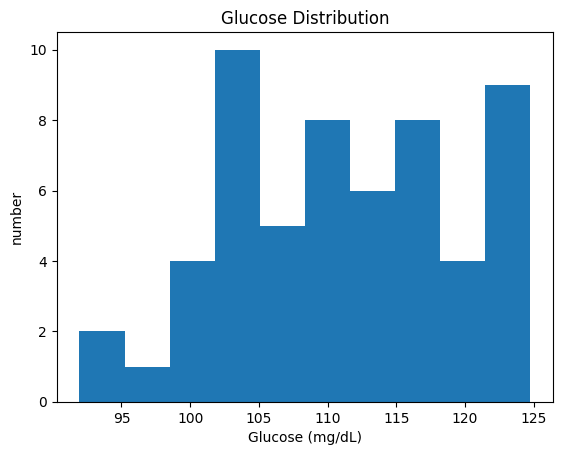

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(values)
plt.title('Glucose Distribution')
plt.xlabel('Glucose (mg/dL)')
plt.ylabel('number');